<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/NaiveBayes/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes 

## 1. Introduction to Naive Bayes

- Collection of __classification__ algorithms based on __Bayes Theorem__.
- Classifies given different __instances (object/data)__ into __predefined classes(groups)__, assuming there is no interdependency of features __(class conditional independence)__.

Just before exploring NB in details, let’s understand __few basic concepts__ first:
1. Conditional Probability
2. Bayes Rule![image.png](attachment:image.png)


This Algo is used for classification problems and the featuers(X) should be catagorical for best Result

# 2. Data Information

It is important that credit card companies are able to recognize __fraudulent credit card transactions__ so that customers are not charged for items that they did not purchase.

# 3. Import Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
cc = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


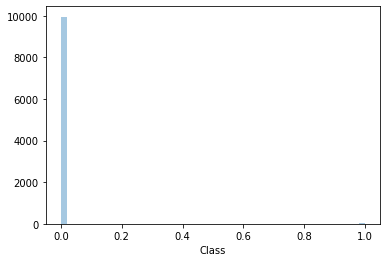

In [0]:
sns.distplot(cc['Class'],kde= False)

In [0]:
pd.value_counts(cc['Class']) 

# Experiment 1: we Will do upsampling of 1 value or down sampling of 0 or both 
# how we will do down sampling 
# 1 lets see at what time max number of frauds are happing.
# 2 for what amount frauds are happning
  # Above Experiment Fails
#----------------------------------------------------------
# Experiment 2: 
#   SMOTE Algo 

0    9962
1      38
Name: Class, dtype: int64

In [0]:
pd.value_counts(cc[ cc['Amount'] == 1 ]['Class'])

0    591
1     29
Name: Class, dtype: int64

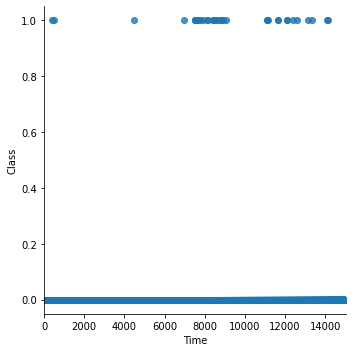

In [0]:
sns.lmplot(x = 'Time',y='Class',data=cc)
# you can see max fraud are happning after 6500

In [0]:
pd.value_counts(cc[(cc['Amount'] == 1) & (cc['Time'] >6500)]['Class'])


0    49
1    29
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


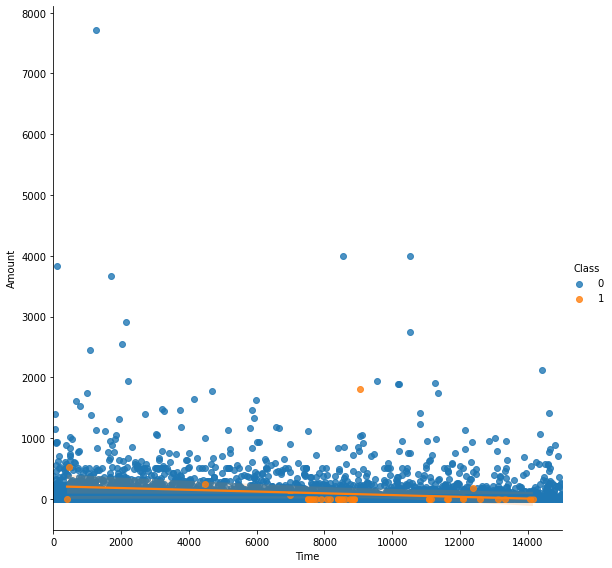

In [0]:
# amount fraud and class in a graph
sns.lmplot(x = 'Time',y='Amount',data=cc,hue='Class',size=8)


In [0]:
!pip install plotly_express

In [0]:
import plotly_express as px

In [0]:
cc['Class'] = cc["Class"].astype("object")
px.scatter_matrix(cc[['V1','V2','Amount','Time','Class']],color='Class')

In [0]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000


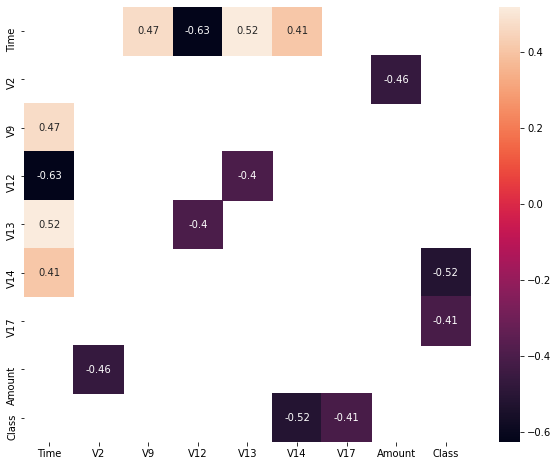

In [0]:
corr = cc.corr()
corr_heatmap = corr[(corr > 0.4) | (corr < -0.4)]
corr_heatmap.replace(to_replace=1,value=np.nan,inplace=True)
corr_heatmap.dropna(axis=1,how='all',inplace=True)
corr_heatmap.dropna(axis=0,how='all',inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_heatmap,annot=True)

In [0]:
# Lets do an experiment with no change in data

In [0]:
from sklearn.model_selection import train_test_split

def model_split_train_test(df,target_column_name,test_size = 0.2):
  X = df.drop(target_column_name,axis=1)
  y = df[target_column_name]
  return train_test_split(X,y,test_size = test_size,random_state = 42,stratify = y.values)

In [0]:
X_train,X_test,y_train,y_test = model_split_train_test(cc,'Class',test_size=0.2)

In [0]:
from sklearn.model_selection import ShuffleSplit,cross_validate

In [0]:
def model_shuffleSplit_train_test(splits = 10,test_size=.3):
  return ShuffleSplit(n_splits = splits, test_size = test_size, train_size = 1-test_size, random_state = 42 )

In [0]:
# fiting train data in model

def get_model_prediction(model_object,X,y):
  #set name and parameters
  final_result = {}
  final_result['Algo_name'] = model_object.__class__.__name__
  cv_results = cross_validate(model_object, X, y, cv  = model_shuffleSplit_train_test(10,.25),return_train_score=True)
  final_result['Algo Time'] = cv_results['fit_time'].mean()
  final_result['Algo Train Accuracy'] = cv_results['train_score'].mean()
  final_result['MLA Test Accuracy'] = cv_results['test_score'].mean()   
  #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
  final_result['MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
  return final_result



In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
X = cc.drop('Class',axis=1)
y = cc['Class']
result = get_model_prediction(GaussianNB(),X,y)

In [0]:
final_results = pd.DataFrame(result.items()).T


In [0]:
final_results

,0,1,2,3,4
0,Algo_name,Algo Time,Algo Train Accuracy,MLA Test Accuracy,MLA Test Accuracy 3*STD
1,GaussianNB,0.00835159,0.98672,0.98572,0.0129694


In [0]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [0]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print ("The Classification Report: \n", classification_report(y_test, y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [0]:
def get_model_confusion_matrix(model_object,df,target_column,test_size = .25):
  X_train,X_test,y_train,y_test = model_split_train_test(df,target_column,test_size)
  result = model_object.fit(X_train,y_train)
  y_pred = result.predict(X_test)
  y_pred_prob = result.predict_proba(X_test)
  return (y_test,y_pred,y_pred_prob) 
  

In [0]:
y_test,y_pred,y_pred_prob = get_model_confusion_matrix(GaussianNB(),cc,'Class')

In [0]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[2457   34]
 [   1    8]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.19      0.89      0.31         9

    accuracy                           0.99      2500
   macro avg       0.60      0.94      0.65      2500
weighted avg       1.00      0.99      0.99      2500

recall score:  0.8888888888888888
precision score:  0.19047619047619047
f1 score:  0.3137254901960784
accuracy score:  0.986
ROC AUC: 0.8860341674472545


In [0]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
y_test,y_pred,y_pred_prob = get_model_confusion_matrix(GaussianNB(),cc,'Class')


In [0]:
y_pred

array([[1.00000000e+00, 1.26600587e-20],
       [1.00000000e+00, 2.01915190e-10],
       [1.00000000e+00, 7.66743514e-23],
       ...,
       [1.00000000e+00, 3.14073122e-23],
       [1.00000000e+00, 2.18759706e-22],
       [1.00000000e+00, 9.90551001e-25]])

In [0]:
corr_heatmap.columns

Index(['Time', 'V2', 'V9', 'V12', 'V13', 'V14', 'V17', 'Amount', 'Class'], dtype='object')

In [0]:
# Experiment 2
cc.drop(['V9', 'V12', 'V13', 'V14', 'V17'],axis = 1,inplace = True)
y_test,y_pred,y_pred_prob = get_model_confusion_matrix(GaussianNB(),cc,'Class')
print_scores(y_test,y_pred,y_pred_prob)

# no good result 

test-set confusion matrix:
 [[2457   34]
 [   1    8]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.19      0.89      0.31         9

    accuracy                           0.99      2500
   macro avg       0.60      0.94      0.65      2500
weighted avg       1.00      0.99      0.99      2500

recall score:  0.8888888888888888
precision score:  0.19047619047619047
f1 score:  0.3137254901960784
accuracy score:  0.986
ROC AUC: 0.8860341674472545


In [0]:
# give different prameters
# no parameter in naive bayes


In [0]:
test_pred_df = pd.DataFrame([y_test,y_pred]).T

In [0]:
test_pred_df.columns = ['test','pred']

In [0]:
test_pred_df.pred.fillna(0.0,inplace = True)

In [0]:
test_pred_df[(test_pred_df['test'] == 0) & (test_pred_df['pred'] == 1)]

,test,pred
1074,0.0,1.0
1250,0.0,1.0
769,0.0,1.0
1343,0.0,1.0
2068,0.0,1.0
21,0.0,1.0
1050,0.0,1.0
460,0.0,1.0
1181,0.0,1.0
1488,0.0,1.0


In [0]:
pd.value_counts(y_test)

0    2491
1       9
Name: Class, dtype: int64